<a href="https://colab.research.google.com/github/DheerajKP1/15-puzzle/blob/master/yolov8_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
import imutils
import shutil
import math
import keras
from glob import glob
from skimage import io
from shutil import copy
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import save_model

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
'''!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1noAejnCZB0LPk6DA1o5")
project = rf.workspace("iit-kgp-hddfw").project("tyre-ylryk")
dataset = project.version(5).download("yolov8")'''

'!pip install roboflow\n\nfrom roboflow import Roboflow\nrf = Roboflow(api_key="1noAejnCZB0LPk6DA1o5")\nproject = rf.workspace("iit-kgp-hddfw").project("tyre-ylryk")\ndataset = project.version(5).download("yolov8")'

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
'''from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='/content/tyre-5/data.yaml', epochs=100, imgsz=640)'''

"from ultralytics import YOLO\n\n# Load a model\nmodel = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)\n\n# Train the model\nresults = model.train(data='/content/tyre-5/data.yaml', epochs=100, imgsz=640)"

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 15.0 MB/s eta 0:00:00


In [ ]:
path='/content/drive/MyDrive/original_tyre/80.jpg'
#begin = time.time()
model=YOLO('/content/drive/MyDrive/yolov8-seg/segment/train2/weights/best.pt')
result=model(path,save=True,save_txt=True)[0]
input_img=result.orig_img
if result.masks==None:
  print('roi not find')
  plt.imshow(input_img)
else :
  result=model(path,save=True,save_txt=True,conf=float('{:.2f}'.format(result[0].boxes.conf.item()))-0.01)[0]

input_img=result.orig_img
o_path=f"{result.save_dir}/{path.split('/')[-1]}"
masked_img=plt.imread(o_path)


image 1/1 /content/drive/MyDrive/original_tyre/80.jpg: 640x480 1 roi, 96.0ms
Speed: 13.8ms preprocess, 96.0ms inference, 892.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels

image 1/1 /content/drive/MyDrive/original_tyre/80.jpg: 640x480 1 roi, 8.7ms
Speed: 3.5ms preprocess, 8.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels


<ipython-input-9-7f69bf7763cf>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


Text(0.5, 1.0, 'Masked_img')

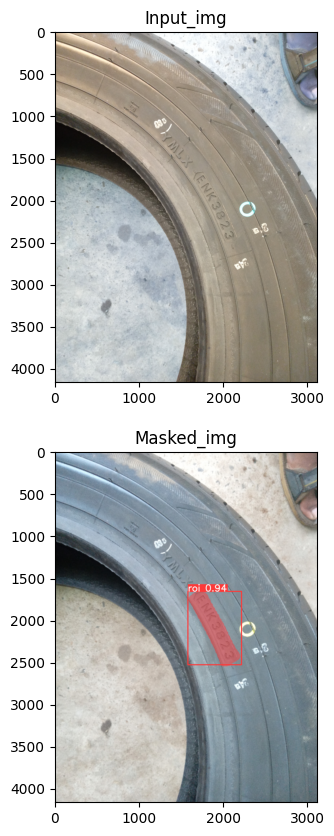

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(masked_img)
plt.subplot(2,1,1)
plt.imshow(input_img)
plt.title('Input_img')
plt.subplot(2,1,2)
plt.imshow(masked_img)
plt.title('Masked_img')

In [ ]:
H,W,_=masked_img.shape
print(H,W)

4160 3120


In [ ]:
for j,mask in enumerate(result.masks.data):
  #mask=mask.cuda()
  mask=mask.cpu().numpy()*255
  mask=cv.resize(mask,(W,H))
  cv.imwrite('/content/output3.jpg',mask)

In [ ]:
mask=plt.imread('/content/output3.jpg')
ret,thresh = cv.threshold(mask,100,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
max_cnt_index = max(range(len(contours)), key=lambda i: cv.contourArea(contours[i]))
cnt=contours[max_cnt_index]

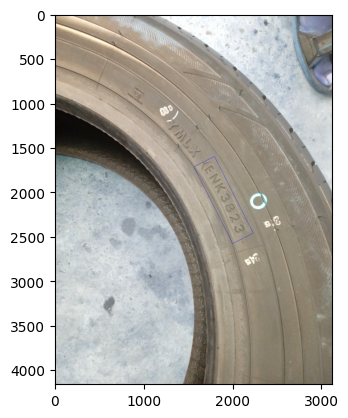

In [ ]:
img=result.orig_img
plt.imshow(img)
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
plt.imshow(cv.drawContours(img,[box],0,(0,0,255),2))

In [ ]:
box

array([[1558, 1717],
       [1789, 1600],
       [2225, 2463],
       [1993, 2580]])

In [ ]:
w=int(math.dist(box[0],box[1]))
h=int(math.dist(box[1],box[2]))
w,h

(258, 966)

In [ ]:

def row_sum(box):
    return np.sum(box)
min_sum_index = min(range(len(box)), key=lambda i: row_sum(box[i]))

if (w<h):
  box = np.roll(box,-1,axis=0)
  min_sum_index-= 1
  print(box)


[[1789 1600]
 [2225 2463]
 [1993 2580]
 [1558 1717]]


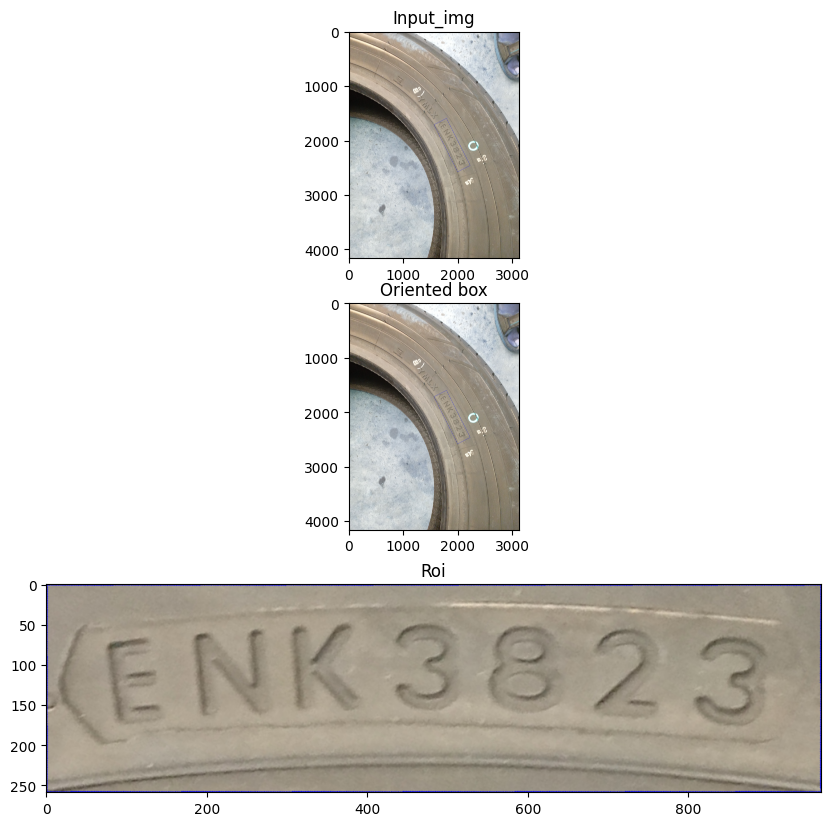

In [ ]:
w=int(math.dist(box[0],box[1]))
h=int(math.dist(box[1],box[2]))
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title('Input_img')
plt.imshow(input_img)
plt.subplot(3,1,2)
plt.title('Oriented box')
plt.imshow(img)
point1=np.float32(box)
point2=np.float32([[0,0],[w,0],[w,h],[0,h]])
M=cv.getPerspectiveTransform(point1,point2)
roi=cv.warpPerspective(img,M,(w,h))
plt.subplot(3, 1, 3)
plt.title("Roi")
plt.imshow(roi)
#end = time.time()
#print(f"Total runtime of the program is {end - begin}")

In [ ]:
'''def rename_images(folder_path):
    # Change directory to the folder containing images
    os.chdir(folder_path)

    # Get a list of image files in the directory
    image_files = [f for f in os.listdir() if os.path.isfile(f) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.txt'))]


    # Rename the image files to sequential numbers
    for image_file in enumerate(image_files):

        file_extension = os.path.splitext(image_file[1])[1]
        file_name = os.path.splitext(image_file[1])[0]
        file_name = file_name.split('_')

        new_filename = str(file_name[0]) + file_extension
        #print(new_filename)
        # Rename the file
        os.rename(image_file[1], new_filename)
        print(f"Renamed {image_file[1]} to {new_filename}")

# Replace 'folder_path' with the path to the directory containing your images
folder_path = '/content/drive/MyDrive/croped_images2/tyre text.v3i.yolov8/test/labels'
rename_images(folder_path)'''


'def rename_images(folder_path):\n    # Change directory to the folder containing images\n    os.chdir(folder_path)\n\n    # Get a list of image files in the directory\n    image_files = [f for f in os.listdir() if os.path.isfile(f) and f.lower().endswith((\'.png\', \'.jpg\', \'.jpeg\', \'.gif\', \'.txt\'))]\n\n\n    # Rename the image files to sequential numbers\n    for image_file in enumerate(image_files):\n\n        file_extension = os.path.splitext(image_file[1])[1]\n        file_name = os.path.splitext(image_file[1])[0]\n        file_name = file_name.split(\'_\')\n\n        new_filename = str(file_name[0]) + file_extension\n        #print(new_filename)\n        # Rename the file\n        os.rename(image_file[1], new_filename)\n        print(f"Renamed {image_file[1]} to {new_filename}")\n\n# Replace \'folder_path\' with the path to the directory containing your images\nfolder_path = \'/content/drive/MyDrive/croped_images2/tyre text.v3i.yolov8/test/labels\'\nrename_images(folder_pa

In [ ]:
path = ('/content/drive/MyDrive/croped_images2/tyre text.v3i.yolov8/train/images/101_jpg.rf.5a7a142628114a624efe7674ebf4f2cc.jpg')
file_extension = path.split('_')[1]
file_name = file_extension.split('/')[-1]

In [ ]:
file_name

'101'

In [ ]:
'''# Function to get ROI and save images with the same image name in the output folder
def get_save_roi(input_folder, output_folder):
    model = YOLO('/content/drive/MyDrive/yolov8-seg/segment/train2/weights/best.pt')

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Check for image files
            file_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            result = model(file_path, save=True, save_txt=True)[0]
            if result.masks==None:
              print('roi not find')
              continue
            else :
              result=model(file_path,save=True,save_txt=True,conf=float('{:.2f}'.format(result[0].boxes.conf.item()))-0.01)[0]

            #input_img=result.orig_img
            o_path = f"{result.save_dir}/{filename}"
            masked_img = plt.imread(o_path)
            H,W,_=masked_img.shape
            for j, mask in enumerate(result.masks.data):
                mask = mask.cpu().numpy() * 255
                mask = cv.resize(mask, (W, H))
                cv.imwrite('/content/output3.jpg', mask)

            mask = plt.imread('/content/output3.jpg')
            ret, thresh = cv.threshold(mask, 100, 255, 0)
            contours, hierarchy = cv.findContours(thresh, 1, 2)
            max_cnt_index = max(range(len(contours)), key=lambda i: cv.contourArea(contours[i]))
            cnt = contours[max_cnt_index]
            img = result.orig_img

            rect = cv.minAreaRect(cnt)
            box = cv.boxPoints(rect)
            box = np.int0(box)
            w=int(math.dist(box[0],box[1]))
            h=int(math.dist(box[1],box[2]))
            min_sum_index = min(range(len(box)), key=lambda i: np.sum(box[i]))

            if w < h:
                box = np.roll(box, -1, axis=0)
                min_sum_index -= 1

            w = int(math.dist(box[0], box[1]))
            h = int(math.dist(box[1], box[2]))

            point1 = np.float32(box)
            point2 = np.float32([[0, 0], [w, 0], [w, h], [0, h]])
            M = cv.getPerspectiveTransform(point1, point2)
            roi = cv.warpPerspective(img, M, (w, h))

            cv.imwrite(output_path, roi)
            print(f"ROI saved for {filename} in {output_path}")

# Replace 'input_folder' and 'output_folder' with the paths to your input and output directories respectively
input_folder = '/content/drive/MyDrive/original_tyre'
output_folder = '/content/croped_images'

get_save_roi(input_folder, output_folder)'''


'# Function to get ROI and save images with the same image name in the output folder\ndef get_save_roi(input_folder, output_folder):\n    model = YOLO(\'/content/drive/MyDrive/yolov8-seg/segment/train2/weights/best.pt\')\n\n    for filename in os.listdir(input_folder):\n        if filename.endswith((\'.jpg\', \'.jpeg\', \'.png\', \'.bmp\')):  # Check for image files\n            file_path = os.path.join(input_folder, filename)\n            output_path = os.path.join(output_folder, filename)\n\n            result = model(file_path, save=True, save_txt=True)[0]\n            if result.masks==None:\n              print(\'roi not find\')\n              continue\n            else :\n              result=model(file_path,save=True,save_txt=True,conf=float(\'{:.2f}\'.format(result[0].boxes.conf.item()))-0.01)[0]\n\n            #input_img=result.orig_img\n            o_path = f"{result.save_dir}/{filename}"\n            masked_img = plt.imread(o_path)\n            H,W,_=masked_img.shape\n       

In [ ]:
#%mkdir /content/croped_images2

In [ ]:
#!cp -r "/content/croped_images" "/content/drive/MyDrive/croped_images"

In [ ]:
'''# Function to get ROI and save images with the same image name in the output folder
def get_gray_img(input_folder, output_folder):

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Check for image files
            file_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)
            img = cv.imread(file_path)
            equ = cv.equalizeHist(cv.cvtColor(img,cv.COLOR_BGR2GRAY))

            cv.imwrite(output_path, equ)
            print(f"ROI saved for {filename} in {output_path}")

# Replace 'input_folder' and 'output_folder' with the paths to your input and output directories respectively
input_folder = '/content/drive/MyDrive/croped_images'
output_folder = '/content/croped_images2'

get_gray_img(input_folder, output_folder)'''

'# Function to get ROI and save images with the same image name in the output folder\ndef get_gray_img(input_folder, output_folder):\n\n    for filename in os.listdir(input_folder):\n        if filename.endswith((\'.jpg\', \'.jpeg\', \'.png\', \'.bmp\')):  # Check for image files\n            file_path = os.path.join(input_folder, filename)\n            output_path = os.path.join(output_folder, filename)\n            img = cv.imread(file_path)\n            equ = cv.equalizeHist(cv.cvtColor(img,cv.COLOR_BGR2GRAY))\n\n            cv.imwrite(output_path, equ)\n            print(f"ROI saved for {filename} in {output_path}")\n\n# Replace \'input_folder\' and \'output_folder\' with the paths to your input and output directories respectively\ninput_folder = \'/content/drive/MyDrive/croped_images\'\noutput_folder = \'/content/croped_images2\'\n\nget_gray_img(input_folder, output_folder)'

In [ ]:
#!pip install roboflow

'''from roboflow import Roboflow
rf = Roboflow(api_key="1noAejnCZB0LPk6DA1o5")
project = rf.workspace("iit-kgp-hddfw").project("tyre2")
dataset = project.version(2).download("yolov8")'''


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mCv1Kn9A5JWfzvFbhPAO")
project = rf.workspace("iit-kgp-xmsnm").project("tyre-text-nuycr")
dataset = project.version(4).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 921.9 kB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.9, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to tyre-text-4 in yolov8:: 100%|██████████| 649/649 [00:00<00:00, 5031.33it/s]


In [ ]:
model_t = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 178MB/s]


In [ ]:
#shutil.rmtree('/content/runs')

In [ ]:
results = model_t.train(data='/content/tyre-text-4/data.yaml',epochs=100, imgsz=640)

In [ ]:
#import shutil
shutil.move("/content/dheeraj","/content/drive/MyDrive/dheeraj")

'/content/drive/MyDrive/dheeraj'

In [ ]:
model_t=YOLO('/content/drive/MyDrive/char_detect/weights/best.pt')

In [ ]:
path='/content/drive/MyDrive/CNN_images/abd200.png'
img = cv.imread(path)
img = cv.equalizeHist(cv.cvtColor(img,cv.COLOR_BGR2GRAY))
img = cv.resize(img, (640, 640))
img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
result = model_t(img, save=True, save_txt=True, conf=0.5, save_dir=f"/content/output.jpg")[0]


0: 640x640 7 chars, 20.8ms
Speed: 4.6ms preprocess, 20.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


In [ ]:
cropped_img=cv.imread(path)
o_path=f"{'/content/'}{result.save_dir}/{result.path}"
bbx_img=plt.imread(o_path)

Text(0.5, 1.0, 'bbx_img')

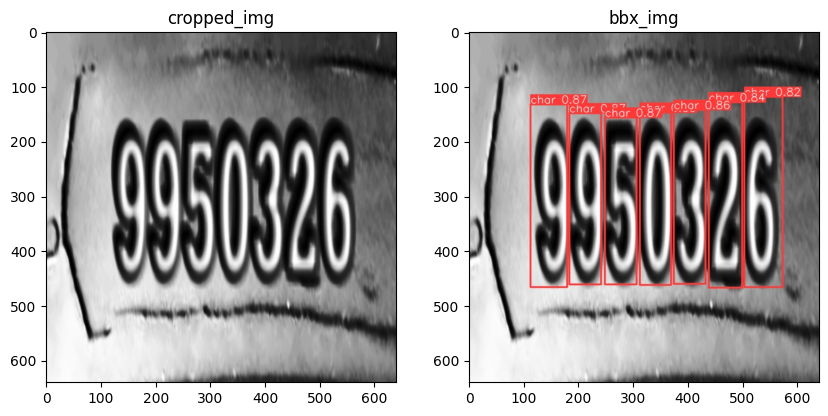

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('cropped_img')
plt.subplot(2,2,2)
plt.imshow(bbx_img)
plt.title('bbx_img')

Text(0.5, 1.0, 'bbx_img')

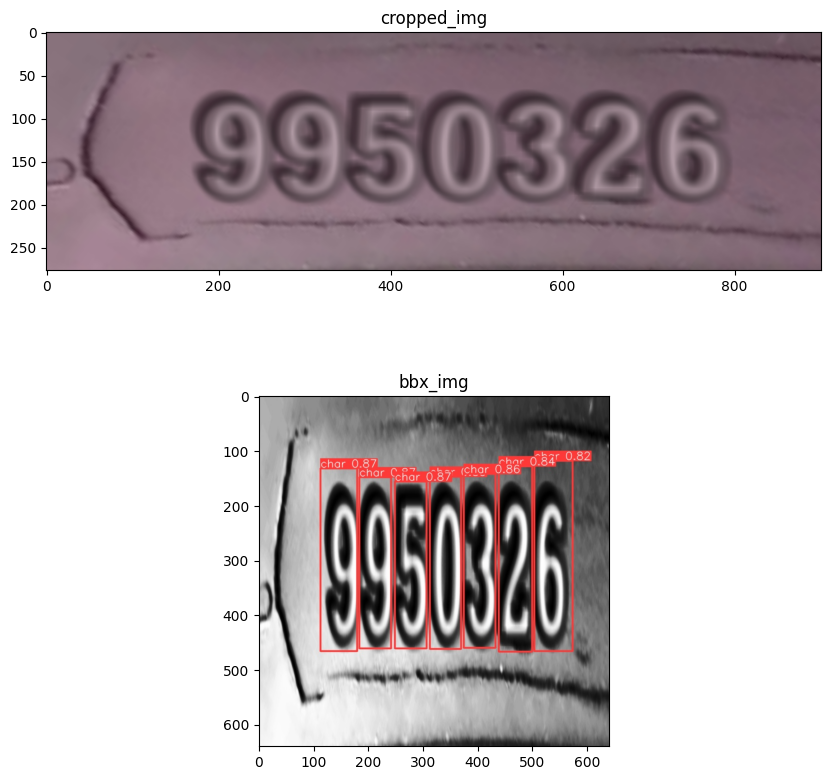

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(cropped_img)
plt.title('cropped_img')
plt.subplot(2,1,2)
plt.imshow(bbx_img)
plt.title('bbx_img')

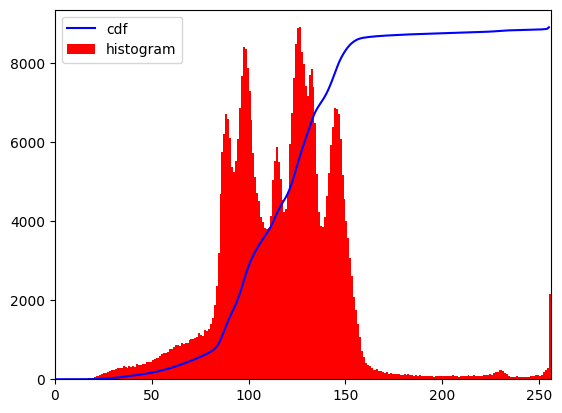

In [ ]:


hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
equ = cv.equalizeHist(cv.cvtColor(img,cv.COLOR_BGR2GRAY))

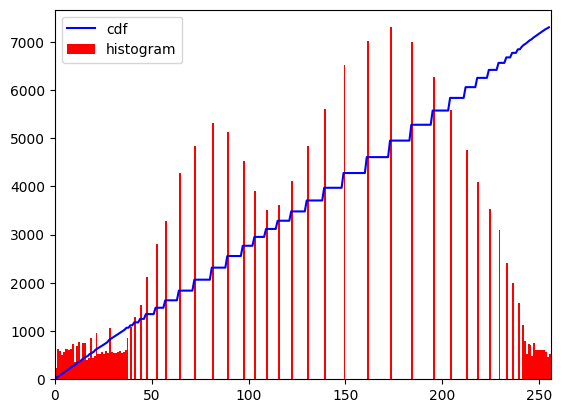

In [ ]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

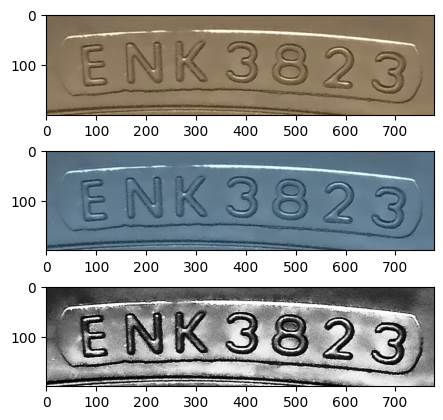

In [ ]:
plt.figure(figsize=(5,5))
plt.subplot(3,1,1)
plt.imshow(img)
plt.subplot(3,1,2)
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
plt.subplot(3,1,3)
plt.imshow(cv.cvtColor(equ,cv.COLOR_BGR2RGB))

In [ ]:
equ

array([[153, 153, 138, ..., 185, 179, 190],
       [138, 130, 114, ..., 173, 167, 173],
       [160, 160, 146, ..., 153, 138, 146],
       ...,
       [146, 153, 160, ...,  39,  72,  58],
       [160, 167, 160, ...,  30,  51,  39],
       [167, 167, 167, ...,  21,  45,  45]], dtype=uint8)

In [ ]:
img.shape

(630, 3312, 3)

In [ ]:
from PIL import Image
gray = cv.cvtColor(equ,cv.COLOR_BGR2RGB)
image = Image.fromarray(gray)
image.save('/content/gray.png')

Text(0.5, 1.0, 'bbx_img')

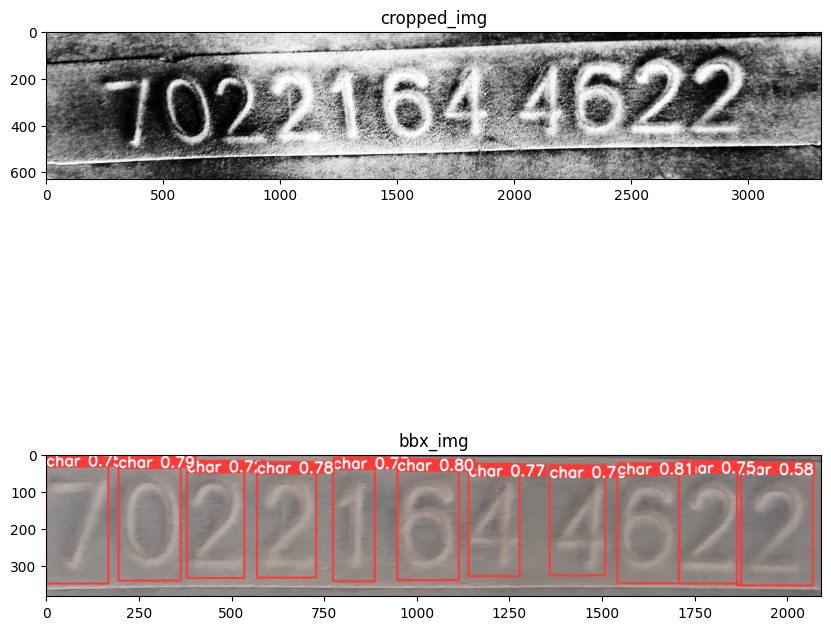

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(result.orig_img)
plt.title('cropped_img')
plt.subplot(2,1,2)
plt.imshow(bbx_img)
plt.title('bbx_img')

In [ ]:
img=plt.imread(path)
cnt=0
cropped_img=[]
for results in result:
  x1,y1,x2,y2=results.boxes.xyxy[0].int()
  cropped_img.append(img[y1:y2, x1:x2])
  ++cnt;


In [ ]:
plt.imshow(cropped_img[2])

In [ ]:
output_folder = '/content/text_folder'
output_path = os.path.join(output_folder,'1')
cv.imwrite(output_path+'.jpg', cropped_img[0])

In [ ]:
plt.imshow(img)


In [ ]:
#shutil.rmtree('/content/drive/MyDrive/text_folder3')

In [ ]:
os.mkdir('/content/text_folder3')

In [ ]:
# Function to get ROI and save images with the same image name in the output folder
def get_save_roi(input_folder, output_folder):
    count = 1
    model_t = YOLO('/content/drive/MyDrive/char_detect/weights/best.pt')
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Check for image files
            file_path = os.path.join(input_folder, filename)
            img = cv.imread(file_path)
            img = cv.equalizeHist(cv.cvtColor(img,cv.COLOR_BGR2GRAY))
            img = cv.resize(img, (640, 640))
            img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
            results = model_t(img, save=True, save_txt=True, conf=0.5)[0]
            for result in results:
              x1,y1,x2,y2 = result.boxes.xyxy[0].int()
              cropped_img = img[y1:y2,x1:x2]
              output_path = os.path.join(output_folder,str(count))
              cv.imwrite(output_path+'.jpg', cropped_img)
              count = count+1

# Replace 'input_folder' and 'output_folder' with the paths to your input and output directories respectively
input_folder = '/content/drive/MyDrive/CNN_images'
output_folder = '/content/text_folder'

get_save_roi(input_folder, output_folder)


In [ ]:
os.system(f"cp -r /content/runs/detect/train /content/drive/MyDrive/char_detect3")

In [ ]:
os.mkdir('./text_folder')

In [ ]:
#!cp -r "/content/runs/detect/train" "/content/drive/MyDrive/char_detect2"

In [ ]:
len(os.listdir('/content/drive/MyDrive/CNN_images'))


495

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/text_folder2')

In [ ]:
os.mkdir('./dheeraj')

In [ ]:
src_fld='/content/drive/MyDrive/text_folder2/'
dst_fld='/content/dheeraj'
start =2401
final =3255
for filename in os.listdir(src_fld):
  file_number=int(filename.split('.')[0])
  if(start<=file_number<=final):
    src_path=os.path.join(src_fld,filename)
    dst_path=os.path.join(dst_fld,filename)
    shutil.copy2(src_path,dst_path)


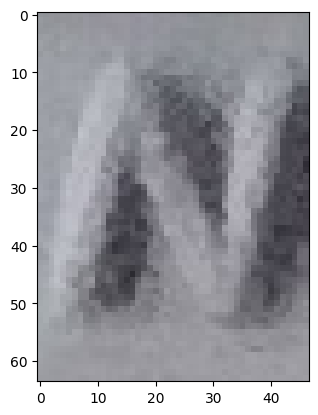

In [ ]:
img = plt.imread('/content/drive/MyDrive/text_folder/text_folder/N/177.jpg')
plt.imshow(img)

In [ ]:
path = '/content/drive/MyDrive/text_folder_m'
train_data = []
img_size = 64
for i in os.listdir(path):
  sub_dir = os.path.join(path,i)
  for j in os.listdir(sub_dir):
    img = plt.imread(os.path.join(sub_dir,j),0)
    img = cv.resize(img,(img_size,img_size))
    train_data.append([img,i])

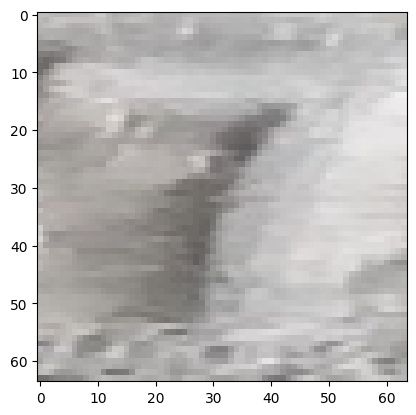

In [ ]:
img_size=64
path = '/content/drive/MyDrive/text_folder_m/7/26.jpg'
img=plt.imread(path)
img = cv.resize(img,(img_size,img_size))
plt.imshow(img)

In [ ]:
len(train_data)

2403

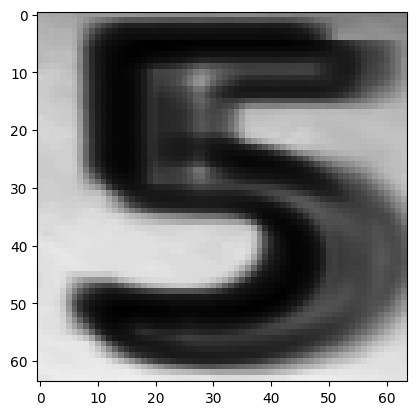

In [ ]:
plt.imshow(train_data[800][0])

In [ ]:
X = []
Y = []
for features,label in train_data:
    X.append(features)
    Y.append(label)

In [ ]:
LB = LabelBinarizer()
Y = LB.fit_transform(Y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.array(X_train)/255.0
X_test = np.array(X_test)/255.0

In [ ]:
print(X_train.shape)

(1922, 64, 64, 3)


In [ ]:
keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(15,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       1

In [ ]:
model.compile(loss='binary_crossentropy', optimizer="adam",metrics=['binary_accuracy'])

In [ ]:
history = model.fit(X_train,y_train, epochs=100, batch_size=16,  verbose=1)

Epoch 1/100
121/121 [==============================] - 15s 31ms/step - loss: 0.4197 - binary_accuracy: 0.9195
Epoch 2/100
121/121 [==============================] - 3s 26ms/step - loss: 0.2015 - binary_accuracy: 0.9455
Epoch 3/100
121/121 [==============================] - 3s 27ms/step - loss: 0.1570 - binary_accuracy: 0.9545
Epoch 4/100
121/121 [==============================] - 3s 25ms/step - loss: 0.1347 - binary_accuracy: 0.9602
Epoch 5/100
121/121 [==============================] - 3s 24ms/step - loss: 0.1160 - binary_accuracy: 0.9658
Epoch 6/100
121/121 [==============================] - 3s 24ms/step - loss: 0.0999 - binary_accuracy: 0.9701
Epoch 7/100
121/121 [==============================] - 3s 24ms/step - loss: 0.0960 - binary_accuracy: 0.9712
Epoch 8/100
121/121 [==============================] - 3s 25ms/step - loss: 0.0886 - binary_accuracy: 0.9739
Epoch 9/100
121/121 [==============================] - 3s 25ms/step - loss: 0.0844 - binary_accuracy: 0.9738
Epoch 10/100
121/1

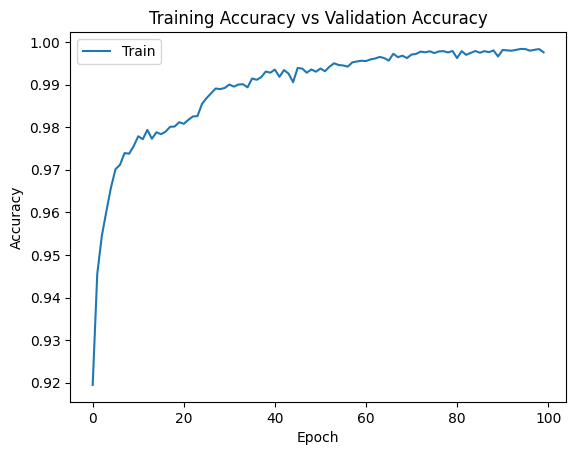

In [ ]:
plt.plot(history.history['binary_accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

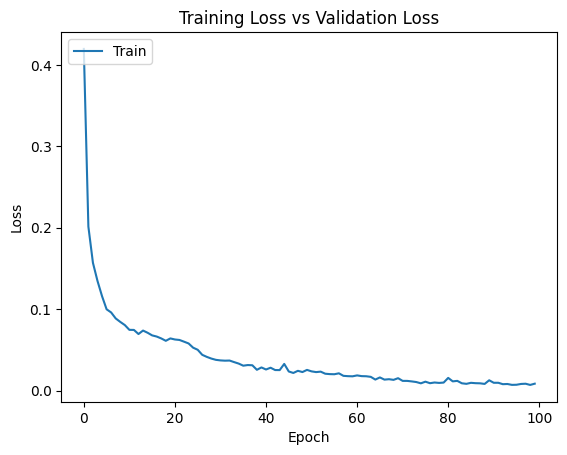

In [ ]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

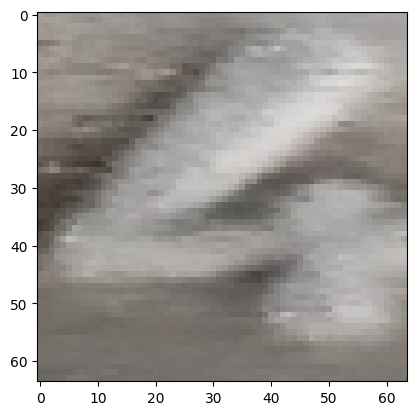

In [ ]:
plt.imshow(X_test[0])

In [ ]:
y=model.predict(X_test)

16/16 [==============================] - 2s 30ms/step


In [ ]:
y=LB.inverse_transform(y)

In [ ]:

y_test=LB.inverse_transform(y_test)

In [ ]:
accuracy_score(y_test,y)

0.9563409563409564

In [ ]:
'''def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)''

SyntaxError: incomplete input (<ipython-input-33-889718196f41>, line 1)

In [ ]:
def get_letters(path):
    img_num = []
    img = cv.imread(path)
    iimg = cv.equalizeHist(cv.cvtColor(img,cv.COLOR_BGR2GRAY))
    img = cv.resize(img, (640, 640))
    img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    results = model_t(img, save=True, save_txt=True, conf=0.5, save_dir=f"/content/output.jpg")[0]
    o_path=f"{results.save_dir}/{path.split('/')[-1]}"
    b_img=plt.imread(o_path)
    img = plt.imread(path)
    for result in results:
        x1,y1,x2,y2=result.boxes.xyxy[0].int()
        roi = img[y1:y2, x1:x2]
        roi = cv.resize(roi,(img_size,img_size))
        roi = roi.reshape(1,img_size,img_size,3)
        print(roi.shape)
        ypred = model.predict(roi)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        img_num.append(x)
    return img_num , b_img

In [ ]:
path = ("/content/drive/MyDrive/croped_images2/28.jpg")
img_num = []
img_size=64
img = cv.imread(path)
img = cv.equalizeHist(cv.cvtColor(img,cv.COLOR_BGR2GRAY))
img = cv.resize(img, (640, 640))
img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
results = model_t(img, save=True, save_txt=True, conf=0.4, save_dir=f"/content/output.jpg")[0]
o_path=f"{results.save_dir}/{path.split('/')[-1]}"
b_img=plt.imread(path)
#img = plt.imread(img)
bounding_boxes = results.boxes.xyxy.int()
sorted_bounding_boxes = sorted(bounding_boxes, key=lambda box: box[0].int())
for result in sorted_bounding_boxes:
    x1,y1,x2,y2 = result
    print('x1=',x1,'x2=',x2,'y1=',y1,'y2=',y2)
    roi = img[y1:y2, x1:x2]
    roi = cv.resize(roi,(img_size,img_size))
    roi = roi.reshape(1,img_size,img_size,3)
    print(roi.shape)
    ypred = model.predict(roi)
    ypred = LB.inverse_transform(ypred)
    [x] = ypred
    img_num.append(x)

['2', '0', '1', '6', '3', '5', '5', '0', '9', '2', '3']


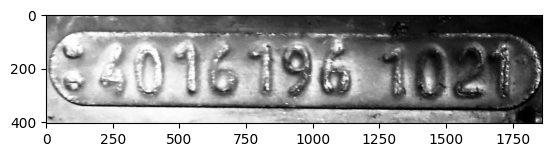

In [ ]:
print(img_num)
plt.imshow(cv.cvtColor(b_img,cv.COLOR_BGR2RGB))